In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [42]:
data = {}
for entry in os.scandir("./recovery"):
    df = pd.read_csv(entry.path)
    
    fixed = {}
    fixed["accuracy"] = []
    fixed["loss"] = []
    fixed["epoch"] = []
    for index, row in df.iterrows():
        things = row[0].split()
        
        if len(things) > 5:
            fixed["epoch"].append(int(things[1][:-1]))
            fixed["accuracy"].append(float(things[3]))
            fixed["loss"].append(float(things[5]))
            
    data[entry.name.split(".")[0]] = fixed

In [43]:
data

{'inductive_gcn': {'accuracy': [0.35267,
   0.39367,
   0.447,
   0.48033,
   0.53,
   0.573,
   0.611,
   0.631,
   0.66833,
   0.69433,
   0.725,
   0.75467,
   0.77433,
   0.79,
   0.80967,
   0.82167,
   0.83433,
   0.84633,
   0.85567,
   0.86433,
   0.86967,
   0.878,
   0.884,
   0.88733,
   0.892,
   0.89367,
   0.89667,
   0.896,
   0.90067,
   0.901,
   0.90233,
   0.90533,
   0.90533,
   0.90933,
   0.91433,
   0.906,
   0.90933,
   0.91267,
   0.91433,
   0.91433,
   0.918,
   0.91267,
   0.91433,
   0.91333,
   0.91733,
   0.92067,
   0.91467,
   0.918,
   0.91767,
   0.91867,
   0.92233,
   0.923,
   0.921,
   0.92067,
   0.921,
   0.921,
   0.92133,
   0.92,
   0.92167,
   0.922,
   0.92333,
   0.919,
   0.92233,
   0.92067,
   0.923,
   0.92067,
   0.92367,
   0.922,
   0.923,
   0.92367,
   0.92467,
   0.923,
   0.924,
   0.923,
   0.922,
   0.92067,
   0.92167,
   0.921,
   0.92267,
   0.92267,
   0.92567,
   0.926,
   0.92233,
   0.92367,
   0.92433,
   0.922,
   0.9

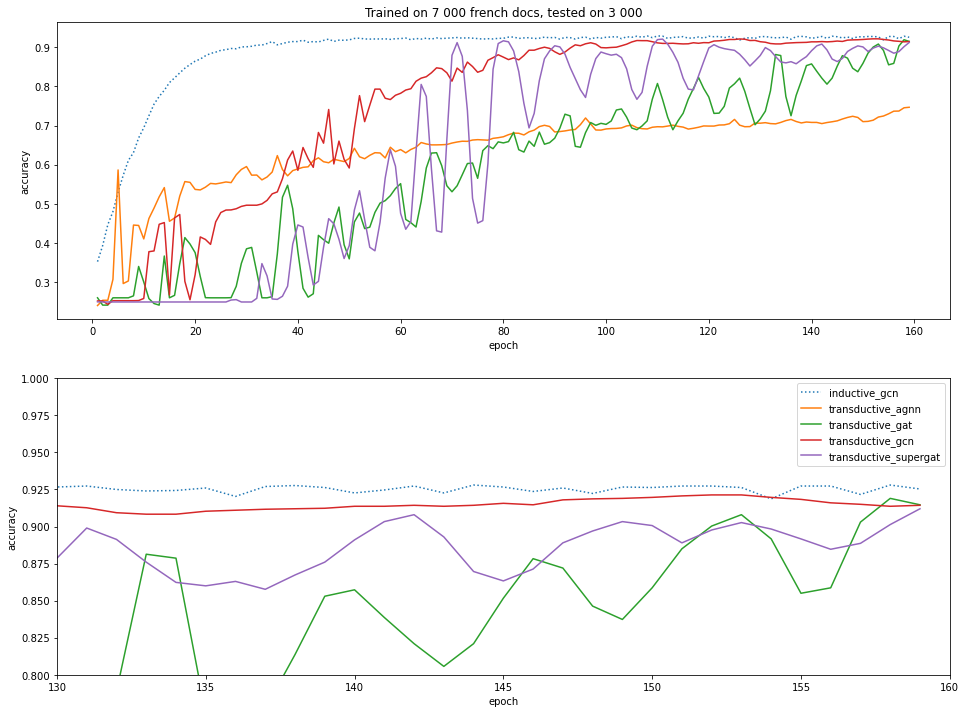

In [44]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(16, 12))

ax.set_xlabel("epoch")
ax.set_ylabel("accuracy")

ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")

ax.set_title("Trained on 7 000 french docs, tested on 3 000")

for name, results in data.items():
    if name.split("_")[0] == "inductive":
        ls = ":"
    else:
        ls = "-"
    ax.plot(results["epoch"], results["accuracy"], label=name, ls=ls)
    ax2.plot(results["epoch"], results["accuracy"], label=name, ls=ls)
    
ax2.set_ylim(0.8, 1)
ax2.set_xlim(130, 160)
    
plt.legend()

In [51]:
data = {}
for entry in os.scandir("./ GPU_on_1K"):
    df = pd.read_csv(entry.path)
    
    ductive = entry.name.split(".")[1]
    name = ductive + "_" + df["model"][0]
    
    accuracies = df["accuracy"].values
    
    data[name] = {"accuracy": accuracies, "epoch": [i+1 for i in range(len(accuracies))]}

In [52]:
data

{'inductive_TwoLayerGCNLinearHead': {'accuracy': array([0.4       , 0.31      , 0.3       , 0.3       , 0.31      ,
         0.32333333, 0.33333333, 0.38      , 0.42      , 0.44666667,
         0.47      , 0.49666667, 0.51666667, 0.52666667, 0.50666667,
         0.50333333, 0.51333333, 0.54333333, 0.55666667, 0.57666667,
         0.59333333, 0.57333333, 0.58      , 0.58      , 0.57333333,
         0.6       , 0.59666667, 0.62666667, 0.64      , 0.63333333,
         0.64      , 0.63333333, 0.62333333, 0.64666667, 0.65      ,
         0.66      , 0.66666667, 0.67333333, 0.68333333, 0.67333333,
         0.68666667, 0.7       , 0.70666667, 0.71      , 0.71      ,
         0.68333333, 0.71333333, 0.70666667, 0.70333333, 0.7       ,
         0.71333333, 0.71      , 0.71333333, 0.71      , 0.71      ,
         0.71333333, 0.72333333, 0.70333333, 0.71666667, 0.72      ,
         0.74      , 0.74      , 0.74333333, 0.74333333, 0.75333333,
         0.75      , 0.76333333, 0.76      , 0.75666667,

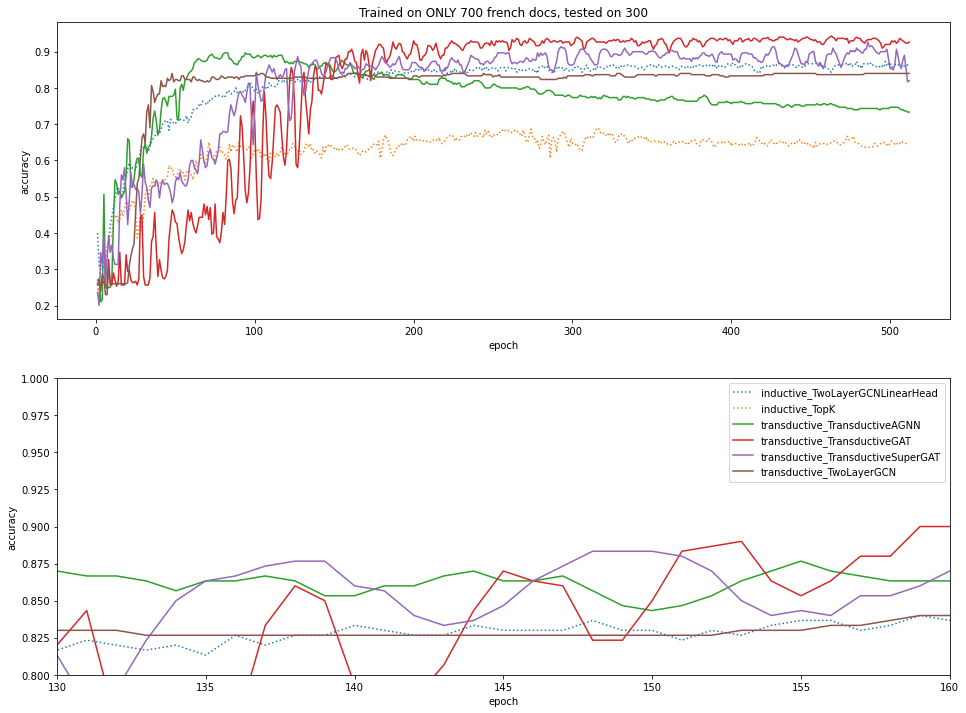

In [53]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(16, 12))

ax.set_xlabel("epoch")
ax.set_ylabel("accuracy")

ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")

ax.set_title("Trained on ONLY 700 french docs, tested on 300")

for name, results in data.items():
    if name.split("_")[0] == "inductive":
        ls = ":"
    else:
        ls = "-"
    ax.plot(results["epoch"], results["accuracy"], label=name, ls=ls)
    ax2.plot(results["epoch"], results["accuracy"], label=name, ls=ls)
    
ax2.set_ylim(0.8, 1)
ax2.set_xlim(130, 160)
    
plt.legend()